In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.linalg import inv, det

<b> Exercício 1.</b> Encontrar máximo da função a seguir 
$$
\textbf{f}(x,y,z) = \begin{bmatrix}
x^2 + y^2 + z^2\\ 
2x^2 + y^2 - 4z\\ 
3x^2 - 4y + z^2
\end{bmatrix}$$

Portanto, $\textbf{f}(\textbf{t}) = 0$, em que $\textbf{t}=(x,y,z)$.

Pelo método de Newton,

$$
\textbf{t}_{n+1} = \textbf{t}_{n} - \left[\textbf{J}_f\right]^{-1}(\textbf{t}_n)\ \textbf{f}(\textbf{t}_n)
$$

Em que,

$$\textbf{J}_f(x,y,z) = 
\begin{bmatrix}
2x & 2y & 2z \\
4x & 2y & -4 \\
6x & -4 & 2z
\end{bmatrix}
$$

In [2]:
def f1(t):
    x, y, z = t[0], t[1], t[2]
    return np.power(x,2) + np.power(y,2) + np.power(z,2)

def f2(t):
    x, y, z = t[0], t[1], t[2]
    return 2*np.power(x,2) + np.power(y,2) - 4*z

def f3(t):
    x, y, z = t[0], t[1], t[2]
    return 3*np.power(x,2) - 4*y + np.power(z,2)

In [3]:
for i in range(0,10):
    if i == 0:
        x = y = z = 0.5
        t = [x,y,z]
        print('Ponto inicial: (x={0}, y={1}, z={2})'.format(t[0], t[1],t[2]))
        print('---------------------------------------------------------------------------------------------------')
        
    # Criando a matriz jacobiana
    Jf = np.array([[2*t[0], 2*t[1], 2*t[2]],
                   [4*t[0], 2*t[1], -4],
                   [6*t[0], -4, 2*t[2]]])
    
    # Calculando a inversa da jacobiana
    Jf_inv = inv(Jf) 
    t[0] = t[0] - np.dot(Jf_inv, [f1(t), f2(t), f3(t)])[0]
    t[1] = t[1] - np.dot(Jf_inv, [f1(t), f2(t), f3(t)])[1]
    t[2] = t[2] - np.dot(Jf_inv, [f1(t), f2(t), f3(t)])[2]

    print('Iteração {0}: (x={1}, y={2}, z={3})'.format(i+1, np.round(t[0],5), np.round(t[1],5),np.round(t[2],5)))
    print('f_1(t) = {}, f_2(t) = {}, f_3(t) = {}'.format(f1(t), f2(t), f3(t)))
    print('---------------------------------------------------------------------------------------------------')

Ponto inicial: (x=0.5, y=0.5, z=0.5)
---------------------------------------------------------------------------------------------------
Iteração 1: (x=0.5, y=0.15, z=0.08775)
f_1(t) = 0.28020006249999985, f_2(t) = 0.17149999999999999, f_3(t) = 0.15770006250000002
---------------------------------------------------------------------------------------------------
Iteração 2: (x=0.27396, y=0.01638, z=0.00421)
f_1(t) = 0.07533829997492238, f_2(t) = 0.1335131446890106, f_3(t) = 0.15967370536974013
---------------------------------------------------------------------------------------------------
Iteração 3: (x=0.13749, y=0.0002, z=1e-05)
f_1(t) = 0.01890269163960834, f_2(t) = 0.037763766388277775, f_3(t) = 0.05588932036037074
---------------------------------------------------------------------------------------------------
Iteração 4: (x=0.06874, y=0.0, z=0.0)
f_1(t) = 0.004725683401525751, f_2(t) = 0.00945136657414596, f_3(t) = 0.014176924373907678
---------------------------------------

___

<b>Exercício 2.</b> 

(1) Achar os raízes da função $f(x)=x^3 + x - 1000$

e a fórmula interativa será,
$$
x_{n+1} = x_{n} - \frac{x_n^3 + x_n - 1000}{3x_n^2 + 1}
$$

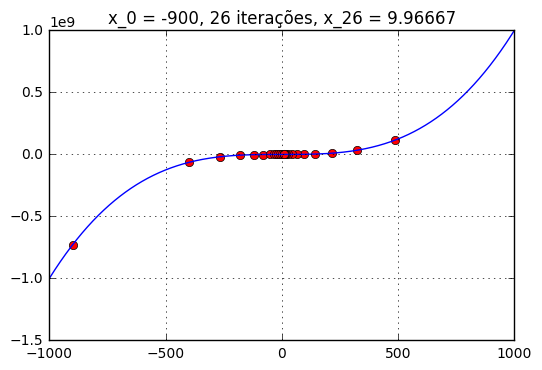

In [4]:
def f(x):
    return np.power(x, 3) + x - 1000

def df(x):
    return 3*np.power(x, 2) + 1

# Definindo o ponto initial, erro e o número máximo de iterações
epsilon = 0.0001 # Aqui definimos o erro de 10^-3
m = x_temp = -900
x = x_temp - f(x_temp)/df(x_temp)
x_axis, y_axis = [x_temp], [f(x_temp)]
max_it = 0

# Iniciando o algoritmo de Newton-Raphson
while abs(f(x) - f(x_temp)) > epsilon and max_it < 1000:
    x_temp = x
    x = x - f(x)/df(x)
    x_axis.append(x)
    y_axis.append(f(x))
    max_it+=1
    
# Fazendo Plot
plt.title('x_0 = {}, {} iterações, x_{} = {}'.format(m, max_it,max_it, np.round(x,5)))
plt.plot(x_axis, y_axis, 'ro')
plt.plot(np.arange(-1000,1000,0.1), f(np.arange(-1000,1000,0.1)))
plt.grid()
plt.show()

(2) Encontrar as raízes da função $f(x) = 4x - 5ln(x) - 5$

e a fórmula iterativa será,

$$
x_{n+1}=x_n - \frac{4x_n - 5ln(x_n) - 5}{4-\frac{5}{x_n}}
$$

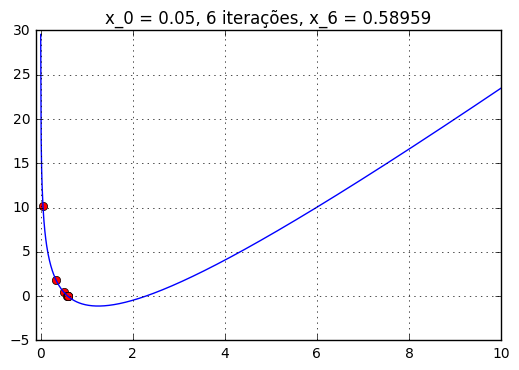

In [5]:
def f(x):
    return 4*x - 5*np.log(x) - 5

def df(x):
    return 4 - 5/x 

# Definindo o ponto initial, erro e o número máximo de iterações
epsilon = 0.0001
m = x_temp = 0.05
x = x_temp - f(x_temp)/df(x_temp)
x_axis, y_axis = [x_temp], [f(x_temp)]
max_it = 0

# Iniciando o algoritmo de Newton-Raphson
while abs(f(x) - f(x_temp)) > epsilon and max_it < 1000:
    x_temp = x
    x = x - f(x)/df(x)
    x_axis.append(x)
    y_axis.append(f(x))
    max_it+=1
    
# Fazendo o plot
plt.title('x_0 = {}, {} iterações, x_{} = {}'.format(m, max_it,max_it, np.round(x,5)))
plt.plot(x_axis, y_axis, 'ro')
plt.plot(np.arange(0.001,10,0.01), f(np.arange(0.001,10,0.01)))
plt.xlim([-0.1, 10])
plt.grid()
plt.show()

(3) Encontrar as raízes $f(x) = e^x - 10x$

E a fórmula iterativa será,

$$
x_{n+1} = x_{n} - \frac{e^{x_n} - 10x_n}{e^{x_n} - 10}
$$

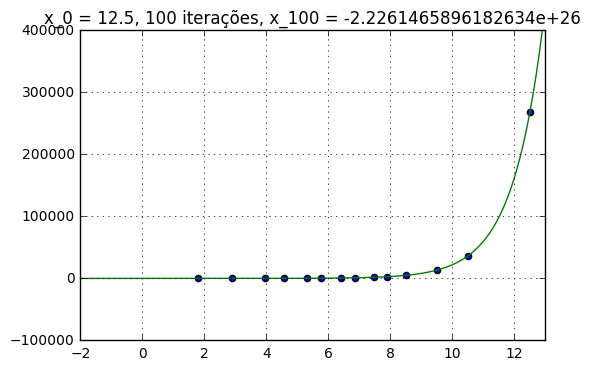

In [6]:
def f(x):
    return np.exp(x) + 10*x

def df(x):
    return np.exp(x) - 10

# Definindo o ponto initial, erro e o número máximo de iterações
epsilon = 0.5
m = x_temp = 12.5
x = x_temp - f(x_temp)/df(x_temp)
x_axis, y_axis = [x_temp], [f(x_temp)]
max_it = 0

# Iniciando o algoritmo de Newton-Raphson
while abs(f(x) - f(x_temp)) > epsilon and max_it < 100:
    x_temp = x
    x = x - f(x)/df(x)
    x_axis.append(x)
    y_axis.append(f(x))
    max_it+=1
    
# Fazendo o plot
plt.title('x_0 = {}, {} iterações, x_{} = {}'.format(m, max_it,max_it, np.round(x,3)))
plt.plot(np.arange(-4,13,0.1), f(np.arange(-4,13,0.1)), 'g-')
plt.scatter(x_axis, y_axis)
plt.ylim([-100000,400000])
plt.xlim([-2, 13])
plt.grid()
plt.show()

No caso acima, o algoritmo não converge , pois a 9ª iteração, quando tomamos $x_0=12.5$, irá sempre nos enviar cada vez mais para a esquerda. Podemos aumentar a nossa tolerância de erro para evitar que haja divergência do algoritmo.

___

<b>Exercício 3.</b>

Queremos aplicar o método de Newton para encontrarmos o máximo da função $f(x,y)=x^4+y^5-2xy + x^2 -y^2$

Neste caso, o método de Newton é usado para minimizar, e portanto queremos minimizar g($\cdot$) = -f($\cdot$), logo,

$g(x,y) = -x^4 - y^5 +2xy +y^2$

O algoritmo iterativo é dado por, 

$$
\textbf{x}_{n+1} = \textbf{x}_{n} - \left[ \textbf{H}_{g}^{-1}\right](\textbf{x}_n)\nabla \textbf{g(x}_n)
$$

Onde,

$$
\left[ \textbf{H}_{g}\right](x,y) = 
\begin{bmatrix}
\frac{\partial^2 g(x,y)}{\partial x ^2} & \frac{\partial^2g(x,y)}{\partial x \partial y} \\
\frac{\partial^2 g(x,y)}{\partial y \partial x} & \frac{\partial^2g(x,y)}{\partial y^2}
\end{bmatrix}
=
-
\begin{bmatrix}
12x^2 + 2 & -2 \\
-2 & 20y^3 - 2
\end{bmatrix}
$$

e 

$$
\nabla \textbf{g}(x,y) = 
\begin{bmatrix}
\frac{\partial g(x,y)}{\partial x}\\
\frac{\partial g(x,y)}{\partial y}
\end{bmatrix}
=
-
\begin{bmatrix}
4x^3 - 2y + 2x\\
5y^4 -2x - 2y
\end{bmatrix}
$$


In [7]:
def g(x,y):
    return -1*(np.power(x,4) + np.power(y, 5) - 2*x*y + np.power(x, 2) - np.power(y, 2))


def hessian(t):
    '''aceita a lista t = [x,y] representando os pontos (x,y)'''
    hessi = -1*np.array([[12*t[0]*t[0]+2, -2],
                      [-2, 20*t[1]*t[1]*t[1] - 2]])
    return hessi

def gradient(t):
    grad = -1*np.array([[4*t[0]*t[0]*t[0] - 2*t[1] + 2*t[0]],
                     [5*t[1]*t[1]*t[1]*t[1] - 2*t[0] - 2*t[1]]])
    return grad

for i in range(0,10):
    print('f({},{}) = {}'.format(np.round(t[0],3),np.round(t[1],3), np.round(g(t[0],t[1]),3)))
    if i == 0:
        # Definindo o ponto inicial t = (1,1)
        t = [1, 1]
    # calculando a inversa da hessiana
    inv_hess = inv(hessian(t))
    # calculando o gradiente
    grad = gradient(t)
    x = t[0] - np.dot(inv_hess, grad)[0]
    y = t[1] - np.dot(inv_hess, grad)[1]
    t = [x[0],y[0]]

f(0.001,0.0) = -0.0
f(0.702,0.911) = 0.746
f(0.571,0.874) = 0.82
f(0.545,0.867) = 0.822
f(0.544,0.867) = 0.822
f(0.544,0.867) = 0.822
f(0.544,0.867) = 0.822
f(0.544,0.867) = 0.822
f(0.544,0.867) = 0.822
f(0.544,0.867) = 0.822
